In [33]:
import pandas as pd
import numpy as np
import json 
import math
import collections
import seaborn as sns
import networkx as nx
from matplotlib import pyplot as plt


In [27]:
filename = '../data/centralities.json'

In [ ]:
G = nx.read_weighted_edgelist(f'../data/RWj.weighted.edgelist')

In [30]:

weights = [G.edges[edge]['weight'] for edge in G.edges()]
maxW = max(weights) 
for edge in G.edges():
    G.edges[edge]['dissimilarity'] =  maxW+1 - G.edges[edge]['weight']

In [31]:
components =  [c for c in sorted(nx.connected_components(G), key=len, reverse=True)]
avg_size = np.average([len(c) for c in components[1:]])
print('average componets size: ', avg_size)
print(len(components))
print([len(c) for c in components[:20]],'etc...')

C = G.subgraph(components[0])


average componets size:  2.728
126
[12625, 21, 11, 11, 7, 7, 7, 6, 5, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3] etc...


In [32]:
import pandas as pd
df = pd.read_csv("../../data_collection/data/tuscany.csv",index_col=0)

for node in C.nodes():
    C.nodes[node]['name'] = df.loc[int(node),'name']
    
df.head()

,position,name,city,menu,link,score,N_reviews,price,Name,Province,...,travellersChoice,latitude,longitude,cuisines,meals,specialDiets,positionlink,province,Link,provinceOK
0,2018,Osteria al Borgo,Lucca,False,/Restaurant_Review-g187898-d23137800-Reviews-O...,5.0,6,NaN,Osteria al Borgo,lucca,...,False,43.851350,10.506207,"Pizza, Tuscan, Central-Italian",NaN,"Vegetarian Friendly, Vegan Options, Gluten Fre...",j39_https://maps.google.com/maps?saddr=&daddr=...,pisa,/Restaurant_Review-g187898-d23137800-Reviews-O...,0
1,551,Acino Bianco,Marina di Massa,False,/Restaurant_Review-g194814-d12843022-Reviews-A...,4.5,92,2.5,Acino Bianco,massacarrara,...,True,44.004616,10.115488,Italian,Dinner,"Vegetarian Friendly, Gluten Free Options",yEU_https://maps.google.com/maps?saddr=&daddr=...,lucca,/Restaurant_Review-g194814-d12843022-Reviews-A...,0
2,308,El Artista Ristorante Argentino,Massa,False,/Restaurant_Review-g660766-d17543924-Reviews-E...,4.5,78,2.5,El Artista Ristorante Argentino,massacarrara,...,False,44.041000,10.124396,"Barbecue, Argentinean, Steakhouse","Dinner, Lunch",NaN,U0P_https://maps.google.com/maps?saddr=&daddr=...,lucca,/Restaurant_Review-g660766-d17543924-Reviews-E...,0
3,1285,La Locanda di Bivigliano,Bivigliano,False,/Restaurant_Review-g1957776-d13948598-Reviews-...,NaN,28,NaN,La Locanda di Bivigliano,florence,...,False,43.896214,11.321173,"Italian, Mediterranean, Barbecue, Tuscan, Cent...",NaN,Vegetarian Friendly,rg1_https://maps.google.com/maps?saddr=&daddr=...,prato,/Restaurant_Review-g1957776-d13948598-Reviews-...,0
4,1499,Beach Bar @PuntAla,Punta Ala,False,/Restaurant_Review-g194871-d19315573-Reviews-B...,2.5,2,1.0,Beach Bar @PuntAla,grosseto,...,False,42.841410,10.775602,"Italian, Mediterranean","Lunch, Brunch, Drinks",NaN,32Q_https://maps.google.com/maps?saddr=&daddr=...,grosseto,/Restaurant_Review-g194871-d19315573-Reviews-B...,1


In [34]:
def plot_kcentral(G,dictionary,k=10):
    sorted_dictionary =  sorted(dictionary.items(), key=lambda x: x[1],reverse = True)
    nodes, values = zip(*sorted_dictionary)
    nodes = nodes[:k]
    values = values[:k]
    names = [G.nodes[node]['name'] for node in nodes]
    
    plt.figure(figsize=(20,5))
    plt.bar(names, values, color=sns.color_palette('ocean',k))
    plt.xticks(rotation=25)

In [35]:
degree_centrality = nx.degree_centrality(C)

In [37]:
with open(filename,'r') as jf: centralities = json.load(jf)

centralities['degree_centrality'] = degree_centrality

with open(filename,'w') as jf: json.dump(centralities,jf)

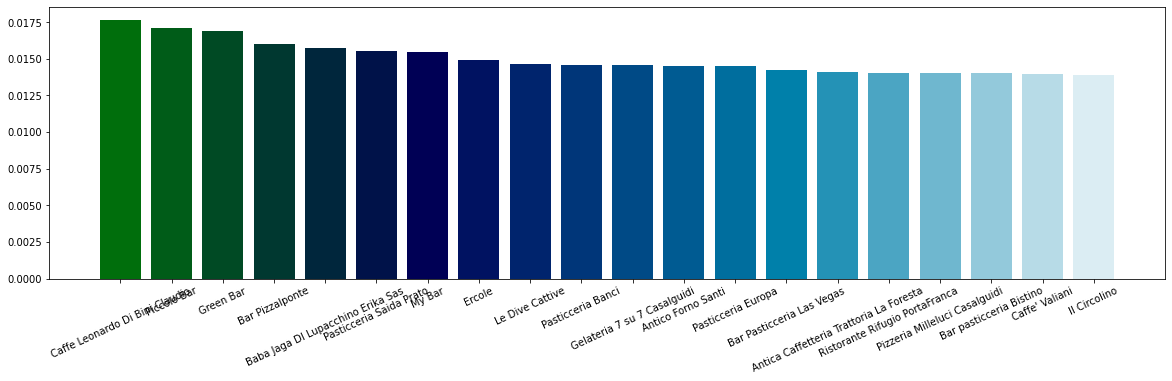

In [36]:
plot_kcentral(G,degree_centrality,20)

In [69]:
eigenvector_centrality = nx.eigenvector_centrality(G, weight=None, max_iter=1000)

In [70]:
with open(filename,'r') as jf: centralities = json.load(jf)

centralities['eigenvector_centrality'] = eigenvector_centrality

with open(filename,'w') as jf: json.dump(centralities,jf)

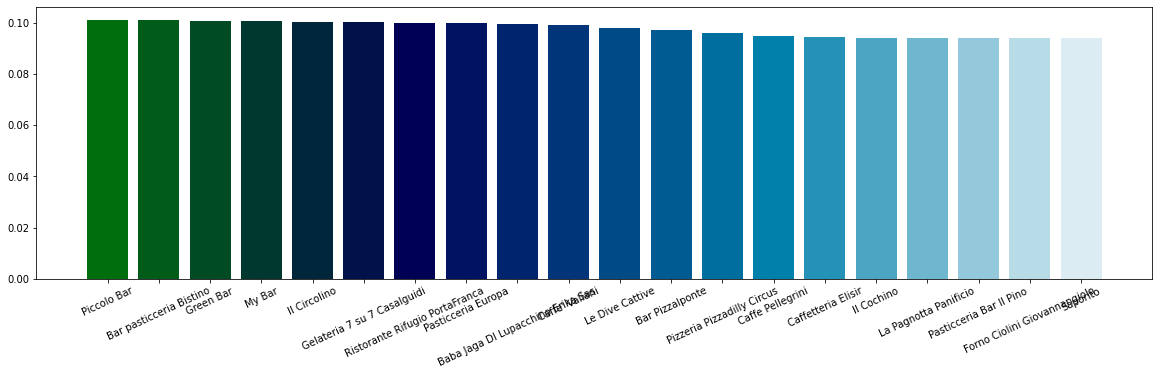

In [73]:
plot_kcentral(G,eigenvector_centrality,20)

(0.0, 1000.0)

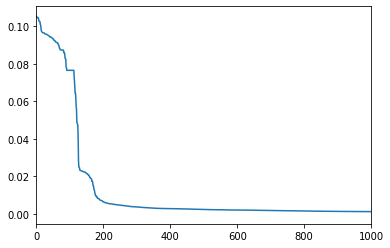

In [40]:
dictionary = eigenvector_centrality
sorted_dictionary =  sorted(dictionary.items(), key=lambda x: x[1],reverse = True)
nodes, values = zip(*sorted_dictionary)
plt.plot(values)
plt.xlim(0,1000)

In [43]:
katz_centrality = nx.katz_centrality(G, weight='dissimilarity', max_iter=2000)

PowerIterationFailedConvergence: (PowerIterationFailedConvergence(...), 'power iteration failed to converge within 2000 iterations')

In [ ]:
with open(filename,'r') as jf: centralities = json.load(jf)

centralities['katz_centrality_w'] = katz_centrality

with open(filename,'w') as jf: json.dump(centralities,jf)

In [ ]:
plot_kcentral(G,katz_centrality)

In [44]:
pagerank_centrality = nx.pagerank(G, weight='dissimilarity')

In [45]:
with open(filename,'r') as jf: centralities = json.load(jf)

centralities['pagerank_centrality_w'] = pagerank_centrality

with open(filename,'w') as jf: json.dump(centralities,jf)

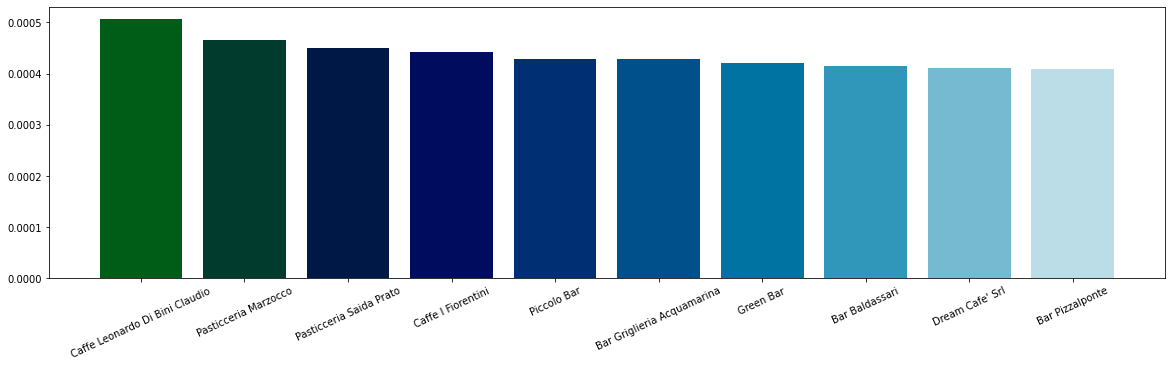

In [46]:
plot_kcentral(G,pagerank_centrality,k=10)

In [52]:
pagerank_centrality = nx.pagerank(G, weight=None)

In [53]:
with open(filename,'r') as jf: centralities = json.load(jf)

centralities['pagerank_centrality'] = pagerank_centrality

with open(filename,'w') as jf: json.dump(centralities,jf)

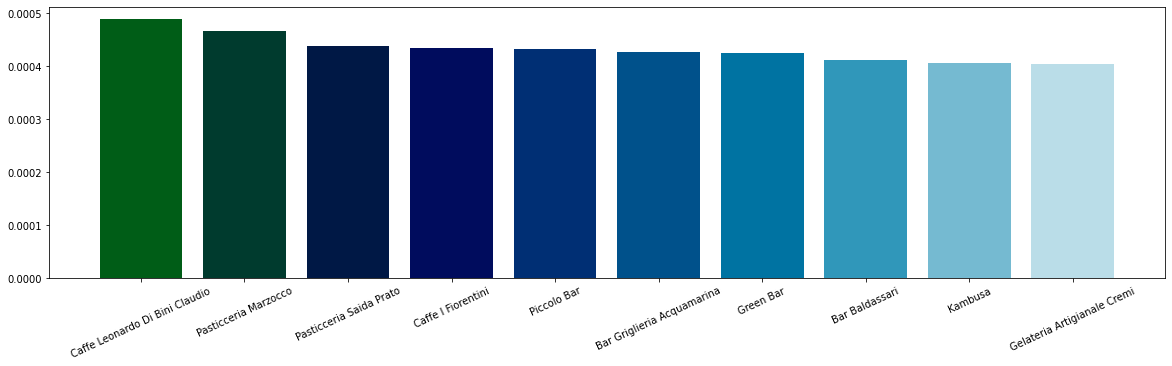

In [58]:
plot_kcentral(G,pagerank_centrality,k=10)

In [64]:
betweenness_centrality = nx.betweenness_centrality(G, weight=None)

In [65]:
with open(filename,'r') as jf: centralities = json.load(jf)

centralities['betwenness_centrality'] = betweenness_centrality

with open(filename,'w') as jf: json.dump(centralities,jf)

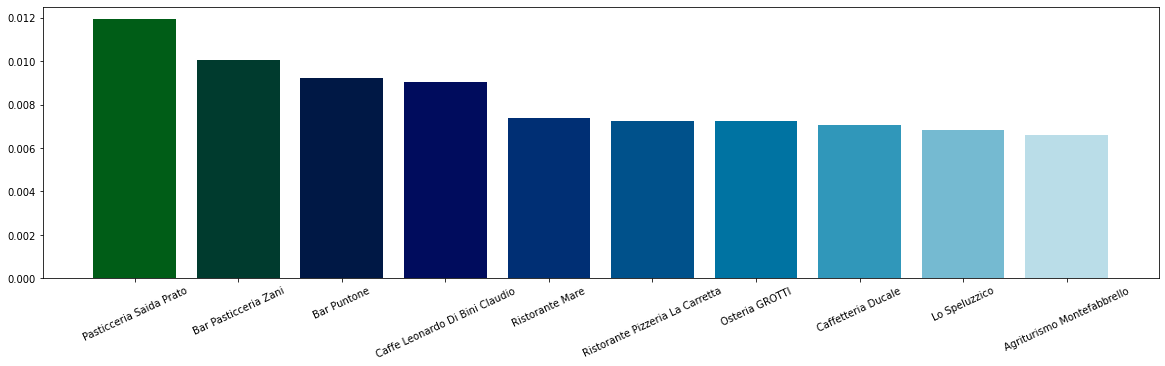

In [66]:
plot_kcentral(G,betweenness_centrality,10)

In [74]:
betweenness_centrality = nx.betweenness_centrality(G, weight="dissimilarity")

KeyboardInterrupt: 

In [ ]:
with open(filename,'r') as jf: centralities = json.load(jf)

centralities['betwenness_centrality_w'] = betweenness_centrality

with open(filename,'w') as jf: json.dump(centralities,jf)

In [ ]:
plot_kcentral(G,betweenness_centrality,10)

In [71]:
with open(filename,'r') as jf: centralities = json.load(jf)

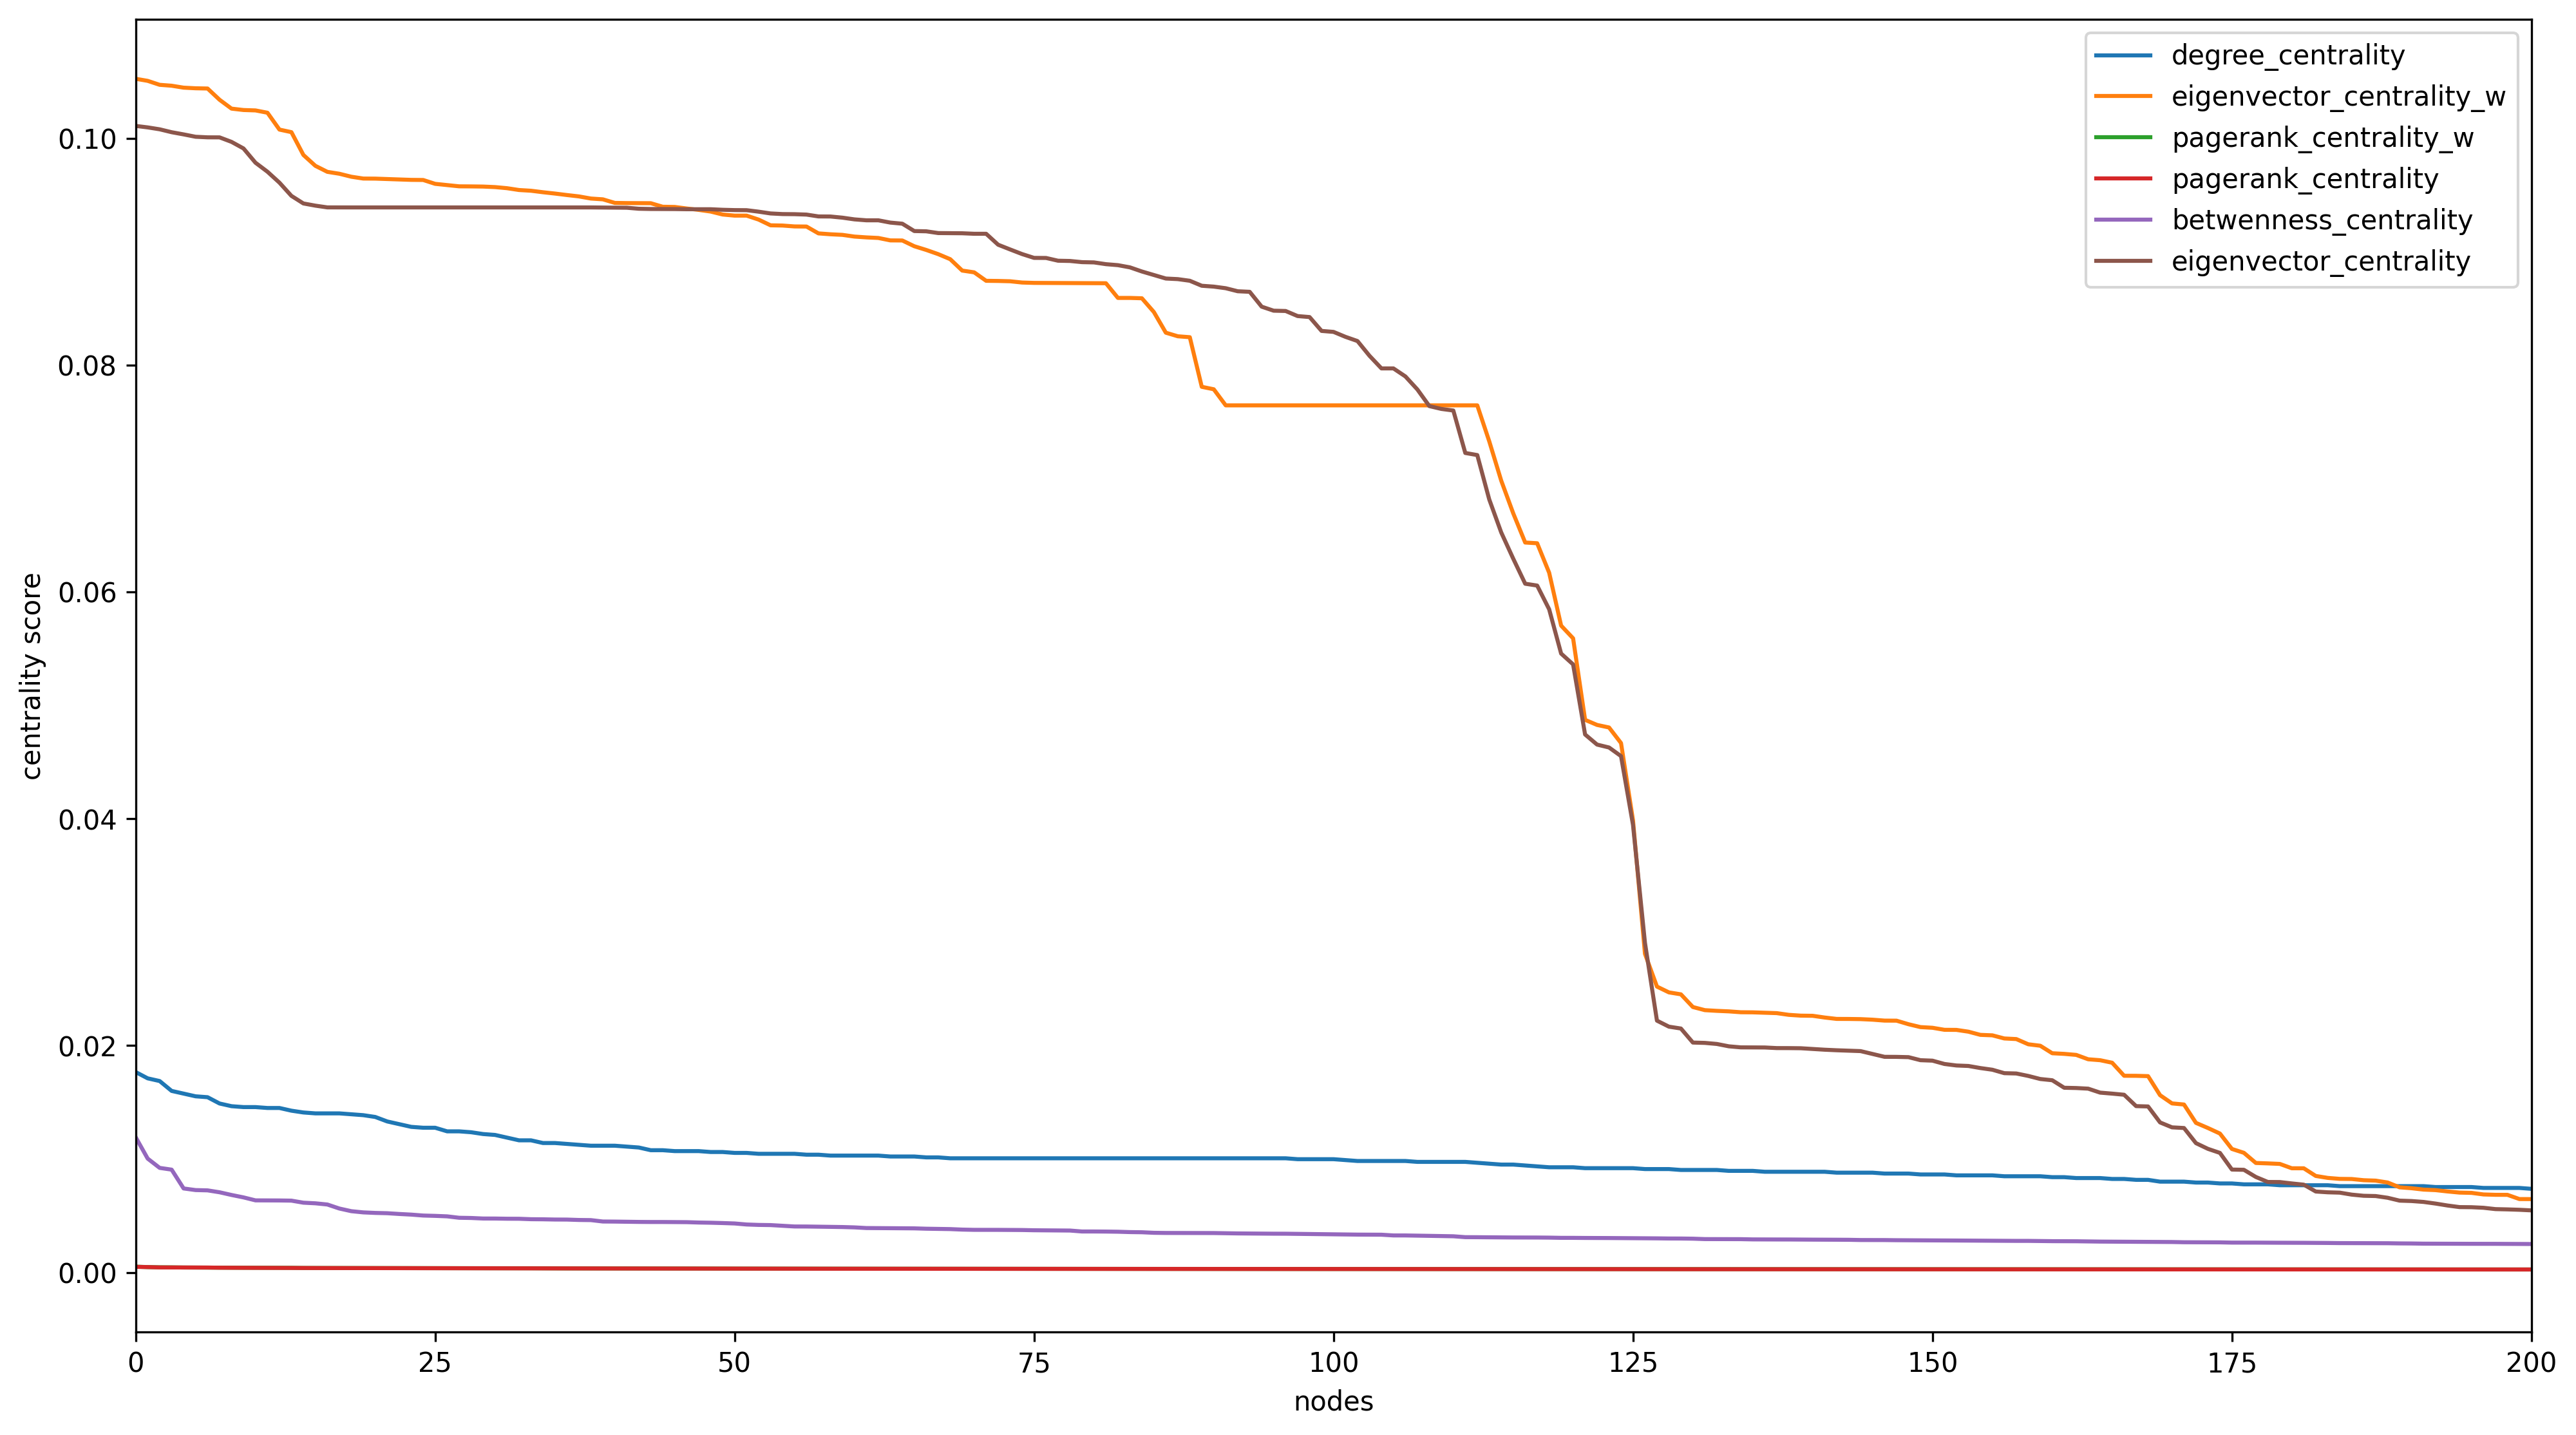

In [72]:
plt.figure(figsize=(16,9),dpi=300)

for name, centrality in centralities.items():
    sorted_dictionary =  sorted(centrality.items(), key=lambda x: x[1],reverse = True)
    nodes, values = zip(*sorted_dictionary)
    plt.plot(values)
    
plt.xlabel('nodes')
plt.ylabel('centrality score')
plt.xlim(0,200)
plt.legend( [name for name, centrality in centralities.items()])
plt.show()